1) Display the number of instances for each class. That is, you should write code to find out how many instances you have for class 1, class 2, class 3, and class 4. (No loops)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#Loading the dataset
dataset = pd.read_csv('data.csv')
pd.value_counts(dataset['custcat'].values, sort=False)

1    266
2    217
3    281
4    236
dtype: int64


 2) Perform one hot encoding on Column 1 (i.e. region) and drop the extra dummy variable.

In [2]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,11].values
#Dealing with categorical variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()

X[:,0] = labelencoder_X.fit_transform(X[:,0])
onehotencoder = OneHotEncoder(categorical_features=[0])
X = onehotencoder.fit_transform(X).toarray()

# Removing the extra dummy variable
X1 = X[:, 1:]

C:\Users\micha\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\micha\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


3) Create histograms of columns age and income to visually explore their distributions.

Text(0, 0.5, 'Frequency')

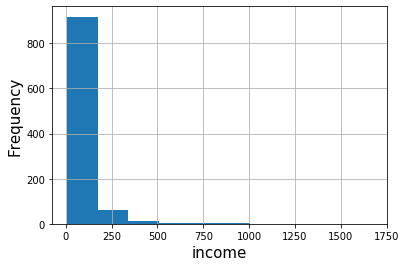

In [4]:
dataset['income'].hist(bins=10)
plt.xlabel("Income", fontsize=15)
plt.ylabel("Frequency",fontsize=15)

Text(0, 0.5, 'Frequency')

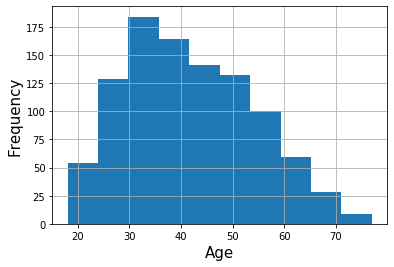

In [5]:
dataset['age'].hist(bins=10)
plt.xlabel("Age", fontsize=15)
plt.ylabel("Frequency",fontsize=15)

4) Split the dataset into training (70%) and testing set (30%).

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1,y,test_size=0.3,random_state=0)



5) Perform normalization of the data using standardization.  

In [12]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

6) Model 1: Fit a logistic regression model. What is the testing misclassification rate you get?

In [32]:
#Fitting Logistic Regression to Training Set
from sklearn.linear_model import LogisticRegression
LRM = LogisticRegression(random_state=0)
LRM.fit(X_train, y_train)

#misclassification rate is one minus model accuracy. 
print('LRM misclassification rate:',1-(LRM.score(X_test,y_test)))

LRM misclassification rate: 0.5900000000000001


C:\Users\micha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\micha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


7) Model 2: We will now fit k-NN. However for k-NN you need to specify the value for k. In order to figure that out, run k-NN in a loop with different values of k (starting from k=5) and compute the testing misclassification rate. Plot a chart with k on X-axis and testing error on the Y-axis. What is the lowest value of testing error and corresponding value of k?  

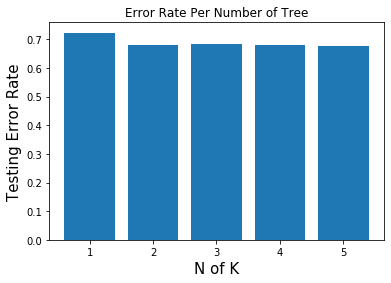

In [18]:
from sklearn.neighbors import KNeighborsClassifier

# try K=5 through K=0 and record testing accuracy
k_range1 = [5,4,3,2,1]

# Create Python dictionary using [] or dict()
scores = []
range2 = []


# We append the scores in the dictionary
for k in k_range1:
    knn = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(1-(knn.score(X_test,y_test)))
    range2.append(k)
    
plt.bar(range2, scores)
plt.xlabel('N of K', fontsize=15)
plt.ylabel('Testing Error Rate', fontsize=15)
plt.xticks(range2, fontsize=10)
plt.title('Error Rate Per Number of Tree')
plt.show()



In [90]:
scores.sort() 
print("Smallest misclassification rate is k-5:", scores[:1] )

knn1 = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn1.fit(X_train, y_train)


Smallest misclassification rate is k-5: [0.6766666666666667]


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

8) Model 3: Fit SVM model with different kernels. Which kernel gives the least testing error?



In [208]:
#Fitting Classifier to Training Set. 
from sklearn.svm import SVC
svclinear = SVC(kernel='linear')
svclinear.fit(X_train, y_train)
print('svclinear misclassification rate:', 1-(svclinear.score(X_test,y_test)))

svcpoly = SVC(kernel='poly')
svcpoly.fit(X_train, y_train)
#Making predictions on the Test Set
print('svcpoly misclassification rate:', 1-(svcpoly.score(X_test,y_test)))

svcrbf = SVC(kernel='rbf')
svcrbf.fit(X_train, y_train)
print('svcrbf misclassification rate:', 1-(svcrbf.score(X_test,y_test)))

svcsigmoid = SVC(kernel='sigmoid')
svcsigmoid.fit(X_train, y_train)
print('svcsigmoid misclassification rate:', 1-(svcsigmoid.score(X_test,y_test)))

print('The kernel with least error is svclinear')

svclinear misclassification rate: 0.5966666666666667
svcpoly misclassification rate: 0.6433333333333333
svcrbf misclassification rate: 0.64
svcsigmoid misclassification rate: 0.6066666666666667
The kernel with least error is svclinear


9) Model 4: Fit Na√Øve Bayes model. What is the testing error you get?

In [167]:
#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.naive_bayes import GaussianNB
nbm = GaussianNB()
nbm.fit(X_train, y_train)
print('nbm misclassification rate:', 1-(nbm.score(X_test,y_test)))

nbm misclassification rate: 0.6133333333333333


10) Model 5: Fit Random Forest model. For Random Forest, you need to specify the number of trees (n_estimators). In order to figure that out, run Random Forest in a loop with different values of n_estimators (starting from 10) and compute the testing misclassification rate. Plot a chart with n_estimators on X-axis and testing error on the Y-axis. What is the lowest value of testing error and corresponding value of n_estimators? 

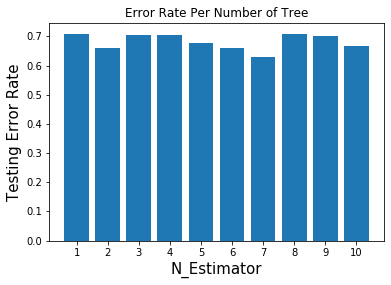

In [168]:
from sklearn.ensemble import RandomForestClassifier

# try K=1 through K=25 and record testing accuracy
k_range = [10,9,8,7,6,5,4,3,2,1]

# We can create Python dictionary using [] or dict()

scores1 = []
range1 = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary

for k in k_range:
    forest = RandomForestClassifier(n_estimators=k, criterion='gini')
    forest.fit(X_train,y_train)
    y_pred = forest.predict(X_test)
    scores1.append(1-(forest.score(X_test,y_test)))
    range1.append(k)
    
plt.bar(range1, scores1)
plt.xlabel('N_Estimator', fontsize=15)
plt.ylabel('Testing Error Rate', fontsize=15)
plt.xticks(range1, fontsize=10)
plt.title('Error Rate Per Number of Tree')
plt.show()  


In [169]:
scores1.sort() 
print("Smallest misclassification rate is k-2:", scores1[:1] )
forest1 = RandomForestClassifier(n_estimators=2, criterion='gini')
forest1.fit(X_train,y_train)

Smallest misclassification rate is k-2: [0.63]


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Q11) Predicting with Ensemble: Now that you have built 5 models. Loop over the testing set. For every test instance, have each of the models predict the class label. Eventual class predicted will be based on a majority vote of the 5 models. What is the testing misclassification rate you get with the ensemble model


In [206]:
from sklearn.metrics import accuracy_score
from collections import Counter
score = []

for item in X_test: 
    newdata = item.reshape(1, -1)
    model1 = LRM.predict(newdata).astype(int)
    model2 = knn1.predict(newdata).astype(int)
    model3 = svclinear.predict(newdata).astype(int)
    model4 = nbm.predict(newdata).astype(int)
    model5 = forest1.predict(newdata).astype(int)
    result = np.concatenate((model1, model2, model3, model4, model5), axis=0).tolist()
    data = Counter(result)
    data2 = data.most_common(1)
    data3 = data2[0]
    score.append(data3[0])
    print(result)
    print(data2)
    
 

[1, 2, 1, 2, 1]
[(1, 3)]
[1, 1, 1, 1, 1]
[(1, 5)]
[2, 2, 2, 1, 1]
[(2, 3)]
[3, 2, 3, 1, 2]
[(3, 2)]
[3, 2, 3, 2, 3]
[(3, 3)]
[1, 2, 1, 1, 1]
[(1, 4)]
[1, 1, 1, 1, 1]
[(1, 5)]
[1, 1, 3, 1, 3]
[(1, 3)]
[1, 3, 1, 1, 1]
[(1, 4)]
[1, 4, 1, 1, 1]
[(1, 4)]
[1, 2, 1, 1, 1]
[(1, 4)]
[3, 4, 3, 3, 4]
[(3, 3)]
[3, 3, 3, 3, 3]
[(3, 5)]
[3, 3, 4, 2, 2]
[(3, 2)]
[1, 1, 1, 1, 3]
[(1, 4)]
[3, 2, 3, 1, 2]
[(3, 2)]
[1, 3, 1, 1, 1]
[(1, 4)]
[1, 1, 1, 1, 1]
[(1, 5)]
[1, 1, 1, 1, 1]
[(1, 5)]
[3, 3, 3, 3, 1]
[(3, 4)]
[2, 2, 2, 2, 2]
[(2, 5)]
[1, 1, 1, 1, 1]
[(1, 5)]
[1, 4, 1, 1, 1]
[(1, 4)]
[2, 2, 2, 2, 1]
[(2, 4)]
[4, 1, 4, 1, 3]
[(4, 2)]
[2, 1, 2, 1, 2]
[(2, 3)]
[2, 4, 2, 2, 2]
[(2, 4)]
[4, 3, 4, 1, 2]
[(4, 2)]
[2, 2, 2, 1, 1]
[(2, 3)]
[4, 2, 4, 4, 4]
[(4, 4)]
[4, 1, 4, 1, 2]
[(4, 2)]
[3, 2, 3, 1, 3]
[(3, 3)]
[2, 3, 2, 1, 2]
[(2, 3)]
[4, 4, 4, 1, 1]
[(4, 3)]
[4, 1, 4, 1, 2]
[(4, 2)]
[1, 3, 1, 1, 2]
[(1, 3)]
[1, 1, 1, 1, 1]
[(1, 5)]
[2, 4, 2, 2, 2]
[(2, 4)]
[3, 3, 4, 2, 1]
[(3, 2)]
[3, 1, 3, 3, 2]
[(3, 3)]


In [207]:
print('misclassification rate is:', 1-(accuracy_score(score, y_test))) 

misclassification rate is: 0.6
